<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/MiTMOvPZ_8_zadanie_%D0%AF%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_%D0%9C%D0%B8%D1%85%D0%B0%D0%B8%D0%BB_6015_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

1. Посчитать суммарное количество слов в `gutenberg_raw` (через `simple_job`)

2. Посчитать суммарное количество слов и суммарное количество предложений одним запуском `simple_job(...)(gutenberg_raw)`

3. Найти (с помощью `simple_job`) самое длинное предложение в gutenberg_raw

4. Посчитать с помощью `simple_job` гистограмму распределения длины предложений (в словах) по датасету `sent_tokenize(gutenberg.raw('carroll-alice.txt'))`. То есть какие предложения в тексте встречаются наиболее часто?

  Потом эти данные можно собрать в pandas DataFrame и визуализировать. Как правильно визуализировать заранее просчитанную гистограмму, см. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

  Подсказка:
  - Вариант 1. Ключом может быть номер ячейки гистограммы. Тогда размер ячеек нужно задать заранее.
  - Вариант 2. Можно посчитать из каждого предложения целую гистограмму. Параметры гистограммы тоже придётся задавать заранее.
  - Вариант 3. Сделать ключом длину предложения. Проще всего с точки зрения map и reduce, но не до конца решает задачу (потребует дополнительной обработки результата).


In [ ]:
import nltk
nltk.download(['gutenberg', 'punkt'])
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print('\n'.join(gutenberg.fileids()))

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


1. Посчитать суммарное количество слов в `gutenberg_raw` (через `simple_job`)

In [ ]:
def simple_jobs1():
    word = len(gutenberg.raw().split())
    return word
gutenberg_raw = simple_jobs1()
print(f"Количество слов: {gutenberg_raw:,}")

Количество слов: 2,135,242


2. Посчитать суммарное количество слов и суммарное количество предложений одним запуском `simple_job(...)(gutenberg_raw)`

In [ ]:
import re
gutenberg_raw = gutenberg.raw()
def simple_jobs2(gutenberg_raw):
    print(f"Количество слов: {len(gutenberg_raw.split()):,}")
    sentences = re.split(r'\.|\?|!', gutenberg_raw)
    # Удалить пустые элементы из списка предложений
    sentences = [sentence for sentence in sentences if sentence.strip() != '']
    return len(sentences)

num_sentences = simple_jobs2(gutenberg_raw)
print(f"Количество предложений: {num_sentences:,}")

Количество слов: 2,135,242
Количество предложений: 100,580


3.Найти (с помощью `simple_job`) самое длинное предложение в gutenberg_raw

In [ ]:
import nltk

gutenberg_raw = gutenberg.raw()
def simple_jobs3():
  longest_sentence = nltk.sent_tokenize(gutenberg_raw)
  return longest_sentence
long_sentence = simple_jobs3()

print(max(long_sentence, key=len))
print(f"Количество символов:{len(max(long_sentence, key=len)):,}")
print(f"Колчество слов: {len(max(long_sentence, key=len).split()):,}")

By the city's quadrangular houses--in log huts, camping with lumber-men,
Along the ruts of the turnpike, along the dry gulch and rivulet bed,
Weeding my onion-patch or hosing rows of carrots and parsnips,
    crossing savannas, trailing in forests,
Prospecting, gold-digging, girdling the trees of a new purchase,
Scorch'd ankle-deep by the hot sand, hauling my boat down the
    shallow river,
Where the panther walks to and fro on a limb overhead, where the
    buck turns furiously at the hunter,
Where the rattlesnake suns his flabby length on a rock, where the
    otter is feeding on fish,
Where the alligator in his tough pimples sleeps by the bayou,
Where the black bear is searching for roots or honey, where the
    beaver pats the mud with his paddle-shaped tall;
Over the growing sugar, over the yellow-flower'd cotton plant, over
    the rice in its low moist field,
Over the sharp-peak'd farm house, with its scallop'd scum and
    slender shoots from the gutters,
Over the western pers

4. Посчитать с помощью `simple_job` гистограмму распределения длины предложений (в словах) по датасету `sent_tokenize(gutenberg.raw('carroll-alice.txt'))`. То есть какие предложения в тексте встречаются наиболее часто?

  Потом эти данные можно собрать в pandas DataFrame и визуализировать. Как правильно визуализировать заранее просчитанную гистограмму, см. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

  Подсказка:
  - Вариант 1. Ключом может быть номер ячейки гистограммы. Тогда размер ячеек нужно задать заранее.
  - Вариант 2. Можно посчитать из каждого предложения целую гистограмму. Параметры гистограммы тоже придётся задавать заранее.
  - Вариант 3. Сделать ключом длину предложения. Проще всего с точки зрения map и reduce, но не до конца решает задачу (потребует дополнительной обработки результата).

In [ ]:
from nltk import word_tokenize, wordpunct_tokenize


In [ ]:
alice_lines = gutenberg.raw('carroll-alice.txt').splitlines()
alice_lines

["[Alice's Adventures in Wonderland by Lewis Carroll 1865]",
 '',
 'CHAPTER I. Down the Rabbit-Hole',
 '',
 'Alice was beginning to get very tired of sitting by her sister on the',
 'bank, and of having nothing to do: once or twice she had peeped into the',
 'book her sister was reading, but it had no pictures or conversations in',
 "it, 'and what is the use of a book,' thought Alice 'without pictures or",
 "conversation?'",
 '',
 'So she was considering in her own mind (as well as she could, for the',
 'hot day made her feel very sleepy and stupid), whether the pleasure',
 'of making a daisy-chain would be worth the trouble of getting up and',
 'picking the daisies, when suddenly a White Rabbit with pink eyes ran',
 'close by her.',
 '',
 'There was nothing so VERY remarkable in that; nor did Alice think it so',
 "VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!",
 "Oh dear! I shall be late!' (when she thought it over afterwards, it",
 'occurred to her that she oug

In [ ]:
import re
word_re = re.compile('\w+|[^\w\s]+')

print('source', len(gutenberg.words('carroll-alice.txt')))
print('split', len(gutenberg.raw('carroll-alice.txt').split()))
print('word_tokenize', len(word_tokenize(gutenberg.raw('carroll-alice.txt'))))
print('wordpunkt_tokenize', len(wordpunct_tokenize(gutenberg.raw('carroll-alice.txt'))))
print('regular expression', len(word_re.findall(gutenberg.raw('carroll-alice.txt'))))

source 34110
split 26443
word_tokenize 33494
wordpunkt_tokenize 34110
regular expression 34110


In [ ]:
print('source', gutenberg.words('carroll-alice.txt')[:50])
print()
print('split', gutenberg.raw('carroll-alice.txt').split()[:50])
print('word_tokenize', word_tokenize(gutenberg.raw('carroll-alice.txt'))[:50])
print('wordpunkt_tokenize', wordpunct_tokenize(gutenberg.raw('carroll-alice.txt'))[:50])
print('regular expression', word_re.findall(gutenberg.raw('carroll-alice.txt'))[:50])

source ['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into']

split ["[Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865]', 'CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank,', 'and', 'of', 'having', 'nothing', 'to', 'do:', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading,', 'but', 'it', 'had']
word_tokenize ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 

Подсчет

In [ ]:
counts = {}

for line in alice_lines:
    words = wordpunct_tokenize(line)

    for word in words:
        word = word.lower()
        counts[word] = counts.get(word, 0) + 1

print(counts)
print(sum(counts.values()))
list(
    reversed(
        sorted((n, word) for word, n in counts.items())
    )
)[:10]

{'[': 3, 'alice': 398, "'": 1731, 's': 201, 'adventures': 7, 'in': 369, 'wonderland': 3, 'by': 59, 'lewis': 1, 'carroll': 1, '1865': 1, ']': 1, 'chapter': 12, 'i': 543, '.': 764, 'down': 102, 'the': 1642, 'rabbit': 51, '-': 141, 'hole': 5, 'was': 357, 'beginning': 14, 'to': 729, 'get': 46, 'very': 144, 'tired': 7, 'of': 514, 'sitting': 10, 'her': 248, 'sister': 9, 'on': 193, 'bank': 3, ',': 1993, 'and': 872, 'having': 10, 'nothing': 34, 'do': 81, ':': 216, 'once': 34, 'or': 77, 'twice': 5, 'she': 553, 'had': 178, 'peeped': 3, 'into': 67, 'book': 11, 'reading': 3, 'but': 170, 'it': 595, 'no': 90, 'pictures': 4, 'conversations': 1, 'what': 141, 'is': 108, 'use': 18, 'a': 632, ",'": 397, 'thought': 74, 'without': 26, 'conversation': 10, "?'": 154, 'so': 151, 'considering': 3, 'own': 10, 'mind': 11, '(': 50, 'as': 263, 'well': 63, 'could': 77, 'for': 153, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 6, '),': 8, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'c

[(1993, ','),
 (1731, "'"),
 (1642, 'the'),
 (872, 'and'),
 (764, '.'),
 (729, 'to'),
 (632, 'a'),
 (595, 'it'),
 (553, 'she'),
 (543, 'i')]

In [ ]:
import pandas as pd

def simple_job(mapper: Callable, reducer:Callable) -> Callable:
  m = map_layer(mapper)
  r = reduce_layer(reducer)
  def inner(records: List) -> Dict:
    return dict(r(merge_layer(m(records))))
  return inner

wordcounter = simple_job(
    lambda f: ((token, 1) for token in word_tokenize(f)),
    sum)
gutenberg_raw = [gutenberg.raw(f) for f in gutenberg.fileids()]

%time result = wordcounter(gutenberg_raw)

pass
sorted(result.items(), key=lambda pair: -pair[1])[:20]

CPU times: user 17.6 s, sys: 121 ms, total: 17.8 s
Wall time: 18 s


[(',', 192339),
 ('the', 125717),
 ('and', 78726),
 ('.', 76300),
 ('of', 70031),
 ('to', 46103),
 ('a', 32390),
 ('in', 31868),
 ('I', 30139),
 (';', 27942),
 ('that', 27262),
 ('he', 22180),
 ('his', 20580),
 ('it', 19660),
 ('was', 18618),
 ('not', 17641),
 ("''", 17043),
 ('for', 16840),
 ('with', 16823),
 (':', 16523)]

In [ ]:
import pandas as pd
df = pd.DataFrame(result.items(), columns=["word", "occurences"])
df

,word,occurences
0,[,131
1,Emma,856
2,by,7981
3,Jane,303
4,Austen,3
...,...,...
61830,Billions,1
61831,Urging,1
61832,heart-thud,1
61833,blither,1


<Axes: ylabel='word'>

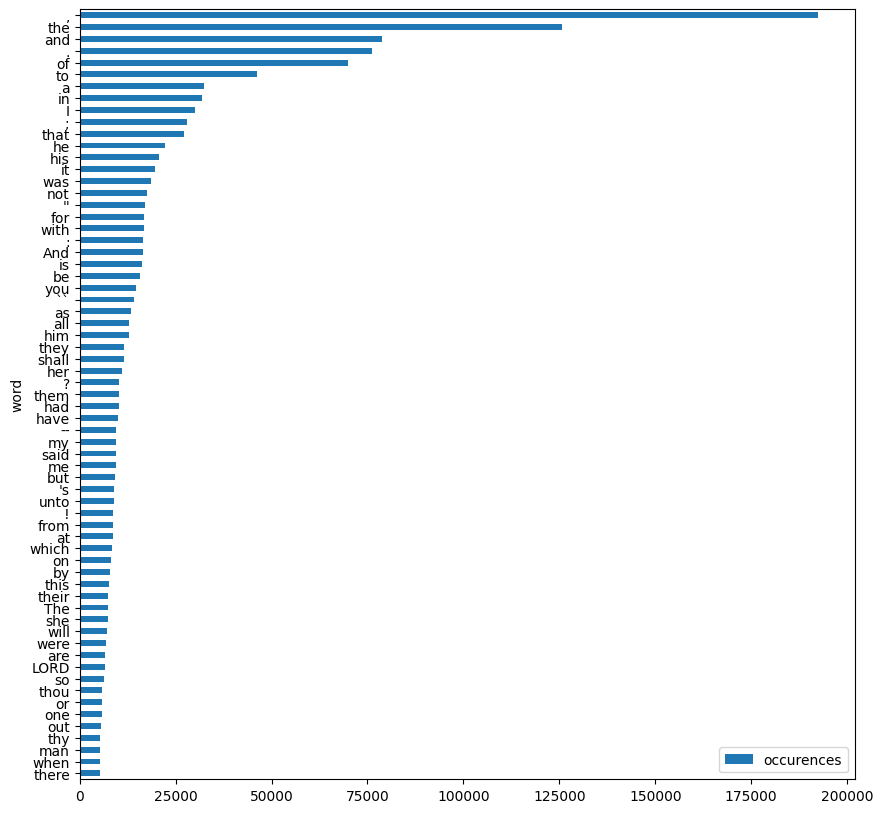

In [ ]:
df[df.occurences>5000].sort_values('occurences').plot(x='word', y='occurences', kind='barh', figsize=(10, 10))

## Задание
5. Переписать mapper и reducer из заданий 1-4 для hadooplike_job, проверить, что логика их работы такая же. Меняется ли ответ, если использовать редюсер и в качестве комбайнера тоже?

In [ ]:
from typing import List, Tuple
def count_words_mapper(line: str) -> List[Tuple[str, int]]:
  return [(w, 1) for w in wordpunct_tokenize(line)]

In [ ]:
count_words_mapper("hello world")

[('hello', 1), ('world', 1)]

In [ ]:
list(map(count_words_mapper,
         ["hello world", "hello me"]
         ))

[[('hello', 1), ('world', 1)], [('hello', 1), ('me', 1)]]

In [ ]:
from typing import List, Iterable

In [ ]:
from typing import Callable

def map_layer(mapper: Callable) -> Callable:
  def inner(records: Iterable) -> List[Tuple]:
    return [(k, v) for r in records for k, v in mapper(r)]
  return inner

word_counters = map_layer(count_words_mapper)

In [ ]:
word_counters( ["hello world", "hello me"])

[('hello', 1), ('world', 1), ('hello', 1), ('me', 1)]

In [ ]:
list(word_counters(alice_lines))[:10]

[('[', 1),
 ('Alice', 1),
 ("'", 1),
 ('s', 1),
 ('Adventures', 1),
 ('in', 1),
 ('Wonderland', 1),
 ('by', 1),
 ('Lewis', 1),
 ('Carroll', 1)]

In [ ]:
from typing import Dict, Any
from collections import defaultdict

def merge_layer(pairs: List[Tuple]) -> Dict[Any, List]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k].append(v)
  return dict(result)

merge_layer([('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)])

{'a': [1, 4, 5], 'b': [2], 'c': [3], 'x': [6], 'y': [7]}

In [ ]:
from itertools import islice
merge_layer(word_counters(islice(alice_lines, 20)))

{'[': [1],
 'Alice': [1, 1, 1, 1],
 "'": [1, 1, 1, 1],
 's': [1],
 'Adventures': [1],
 'in': [1, 1, 1, 1],
 'Wonderland': [1],
 'by': [1, 1, 1],
 'Lewis': [1],
 'Carroll': [1],
 '1865': [1],
 ']': [1],
 'CHAPTER': [1],
 'I': [1, 1],
 '.': [1, 1],
 'Down': [1],
 'the': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Rabbit': [1, 1, 1],
 '-': [1, 1],
 'Hole': [1],
 'was': [1, 1, 1, 1],
 'beginning': [1],
 'to': [1, 1, 1, 1, 1, 1],
 'get': [1],
 'very': [1, 1],
 'tired': [1],
 'of': [1, 1, 1, 1, 1, 1],
 'sitting': [1],
 'her': [1, 1, 1, 1, 1, 1],
 'sister': [1, 1],
 'on': [1],
 'bank': [1],
 ',': [1, 1, 1, 1, 1, 1, 1, 1],
 'and': [1, 1, 1, 1],
 'having': [1],
 'nothing': [1, 1],
 'do': [1],
 ':': [1],
 'once': [1],
 'or': [1, 1, 1],
 'twice': [1],
 'she': [1, 1, 1, 1, 1],
 'had': [1, 1],
 'peeped': [1],
 'into': [1],
 'book': [1, 1],
 'reading': [1],
 'but': [1, 1],
 'it': [1, 1, 1, 1, 1],
 'no': [1],
 'pictures': [1, 1],
 'conversations': [1],
 'what': [1],
 'is': [1],
 'use': [1],
 'a': [1, 1, 1],

reduce

In [ ]:
from typing import Generator
def reduce_layer(reducer: Callable) -> Callable:
  def inner(merged: Dict[Any, List]) -> Dict:
    return {k: reducer(v) for k, v in merged.items()}
  return inner

counter_adder = reduce_layer(sum)

alice_wordcounts = counter_adder(merge_layer(word_counters(alice_lines)))

print(alice_wordcounts)

{'[': 3, 'Alice': 396, "'": 1731, 's': 195, 'Adventures': 3, 'in': 357, 'Wonderland': 3, 'by': 55, 'Lewis': 1, 'Carroll': 1, '1865': 1, ']': 1, 'CHAPTER': 12, 'I': 543, '.': 764, 'Down': 3, 'the': 1527, 'Rabbit': 45, '-': 141, 'Hole': 1, 'was': 352, 'beginning': 14, 'to': 725, 'get': 44, 'very': 126, 'tired': 7, 'of': 500, 'sitting': 10, 'her': 243, 'sister': 9, 'on': 189, 'bank': 3, ',': 1993, 'and': 802, 'having': 10, 'nothing': 30, 'do': 68, ':': 216, 'once': 31, 'or': 76, 'twice': 5, 'she': 509, 'had': 177, 'peeped': 3, 'into': 67, 'book': 11, 'reading': 3, 'but': 133, 'it': 527, 'no': 69, 'pictures': 4, 'conversations': 1, 'what': 93, 'is': 97, 'use': 18, 'a': 615, ",'": 397, 'thought': 74, 'without': 26, 'conversation': 10, "?'": 154, 'So': 27, 'considering': 3, 'own': 10, 'mind': 9, '(': 50, 'as': 246, 'well': 40, 'could': 73, 'for': 140, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 5, '),': 8, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'chain':

In [ ]:
sorted(alice_wordcounts.items(), key=lambda pair: -pair[1])[:10]

[(',', 1993),
 ("'", 1731),
 ('the', 1527),
 ('and', 802),
 ('.', 764),
 ('to', 725),
 ('a', 615),
 ('I', 543),
 ('it', 527),
 ('she', 509)]

In [ ]:
import pandas as pd
df = pd.DataFrame(alice_wordcounts.items(), columns=["word", "occurences"])
df

,word,occurences
0,[,3
1,Alice,396
2,',1731
3,s,195
4,Adventures,3
...,...,...
3011,THEIR,1
3012,sorrows,1
3013,joys,1
3014,remembering,1


<Axes: ylabel='word'>

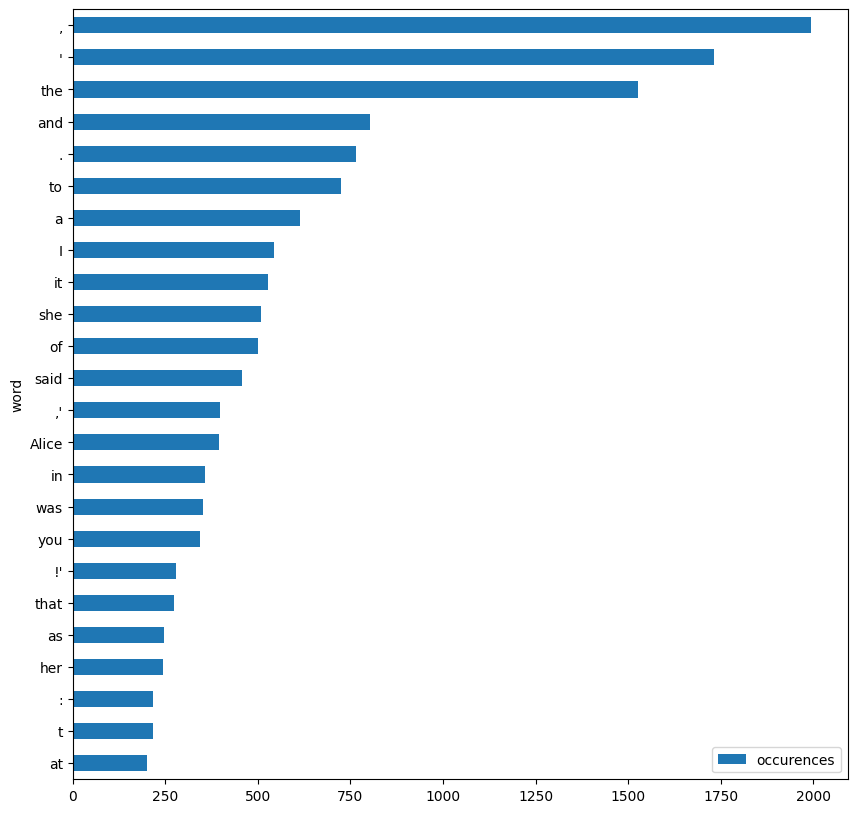

In [ ]:
df[df.occurences>200].sort_values('occurences').plot(x='word', y='occurences', kind='barh', figsize=(10, 10))

In [ ]:
from nltk.corpus import gutenberg
gutenberg_split = [[(f, gutenberg.raw(f))] for f in gutenberg.fileids()]

[[(k, len(v)) for k,v in node_records] for node_records in gutenberg_split]

[[('austen-emma.txt', 887071)],
 [('austen-persuasion.txt', 466292)],
 [('austen-sense.txt', 673022)],
 [('bible-kjv.txt', 4332554)],
 [('blake-poems.txt', 38153)],
 [('bryant-stories.txt', 249439)],
 [('burgess-busterbrown.txt', 84663)],
 [('carroll-alice.txt', 144395)],
 [('chesterton-ball.txt', 457450)],
 [('chesterton-brown.txt', 406629)],
 [('chesterton-thursday.txt', 320525)],
 [('edgeworth-parents.txt', 935158)],
 [('melville-moby_dick.txt', 1242990)],
 [('milton-paradise.txt', 468220)],
 [('shakespeare-caesar.txt', 112310)],
 [('shakespeare-hamlet.txt', 162881)],
 [('shakespeare-macbeth.txt', 100351)],
 [('whitman-leaves.txt', 711215)]]

In [ ]:
gutenberg_lines = [list(enumerate(gutenberg.raw(f).splitlines())) for f in gutenberg.fileids()]

gutenberg_lines[7][:10]

[(0, "[Alice's Adventures in Wonderland by Lewis Carroll 1865]"),
 (1, ''),
 (2, 'CHAPTER I. Down the Rabbit-Hole'),
 (3, ''),
 (4, 'Alice was beginning to get very tired of sitting by her sister on the'),
 (5,
  'bank, and of having nothing to do: once or twice she had peeped into the'),
 (6,
  'book her sister was reading, but it had no pictures or conversations in'),
 (7,
  "it, 'and what is the use of a book,' thought Alice 'without pictures or"),
 (8, "conversation?'"),
 (9, '')]

In [ ]:
from typing import TypeVar

# ignoring k
def word_counts(k:Any, text:str) -> List[Tuple[str, int]]:
  return [(word, 1) for word in word_tokenize(text)]

T = TypeVar('T')

def len_mapper(k: T, text) -> List[Tuple[T, int]]:
  return [(k, len(text))]

[[len_mapper(k, v) for k, v in local_records] for local_records in gutenberg_split]

[[[('austen-emma.txt', 887071)]],
 [[('austen-persuasion.txt', 466292)]],
 [[('austen-sense.txt', 673022)]],
 [[('bible-kjv.txt', 4332554)]],
 [[('blake-poems.txt', 38153)]],
 [[('bryant-stories.txt', 249439)]],
 [[('burgess-busterbrown.txt', 84663)]],
 [[('carroll-alice.txt', 144395)]],
 [[('chesterton-ball.txt', 457450)]],
 [[('chesterton-brown.txt', 406629)]],
 [[('chesterton-thursday.txt', 320525)]],
 [[('edgeworth-parents.txt', 935158)]],
 [[('melville-moby_dick.txt', 1242990)]],
 [[('milton-paradise.txt', 468220)]],
 [[('shakespeare-caesar.txt', 112310)]],
 [[('shakespeare-hamlet.txt', 162881)]],
 [[('shakespeare-macbeth.txt', 100351)]],
 [[('whitman-leaves.txt', 711215)]]]

In [ ]:
def alise_lines(nodes:int=4, records:int=4, size:int=3) -> List[List[Tuple[Tuple[int, int], str]]]:
  return [[(i*records+j, gutenberg.raw('carroll-alice.txt')) for j in range(records)] for i in range(nodes)]

alise_lines()

[[(0,
   '[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what is the use of a book,\' thought Alice \'without pictures or\nconversation?\'\n\nSo she was considering in her own mind (as well as she could, for the\nhot day made her feel very sleepy and stupid), whether the pleasure\nof making a daisy-chain would be worth the trouble of getting up and\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\nclose by her.\n\nThere was nothing so VERY remarkable in that; nor did Alice think it so\nVERY much out of the way to hear the Rabbit say to itself, \'Oh dear!\nOh dear! I shall be late!\' (when she thought it over afterwards, it\noccurred to her that she ought to have wondered at this, but at the ti

In [ ]:
records = [('a', 1), ('b', 2), ('c', 3)]
print(list(zip(*records)))

[('a', 'b', 'c'), (1, 2, 3)]


In [ ]:
list(map(lambda k, v: (k, v), ('a', 'b', 'c'), (1, 2, 3)))

[('a', 1), ('b', 2), ('c', 3)]

In [ ]:
def map_local(mapper: Callable) -> Callable:
  def inner(records: Iterable[Tuple]) -> List:
    return [pair for k, v in records for pair in mapper(k, v)]
  return inner

def double(k, v) -> List[Tuple]:
  return [(k, v)] * 2

print(f"double('a', 1)=", double('a', 1))

print(records, " -> map_local(double) -> ", map_local(double)(records))

double('a', 1)= [('a', 1), ('a', 1)]
[('a', 1), ('b', 2), ('c', 3)]  -> map_local(double) ->  [('a', 1), ('a', 1), ('b', 2), ('b', 2), ('c', 3), ('c', 3)]


In [ ]:
K = TypeVar('K')
V = TypeVar('V')

def merge(pairs: Tuple[K, V]) -> List[Tuple[K, List[V]]]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k] = result[k] + [v]
  return list(result.items())

records = [('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)]

print(f'merge({records}) = ', merge(records))

merge([('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)]) =  [('a', [1, 4, 5]), ('b', [2]), ('c', [3]), ('x', [6]), ('y', [7])]


In [ ]:
def summer(k: K, values: List[V]) -> List[Tuple[K, Any]]:
  return [(k, sum(values))]

summer('x', range(10))

[('x', 45)]

In [ ]:
local_data = [('a', [1, 2, 3]), ('b', [2])]

print(f"summer('a', [1,2,3])=", summer('a', [1,2,3]))

print(local_data, " -> map_local(summer) -> ", map_local(summer)(local_data))

summer('a', [1,2,3])= [('a', 6)]
[('a', [1, 2, 3]), ('b', [2])]  -> map_local(summer) ->  [('a', 6), ('b', 2)]


In [ ]:
from typing import Hashable
def hash_partitioner(k:Hashable, v:int, N:int) -> int:
  return hash(k)%N
data = "Hello World!"
list(zip(data, [hash_partitioner(c, 'whatever', 7) for c in data]))

[('H', 0),
 ('e', 1),
 ('l', 6),
 ('l', 6),
 ('o', 6),
 (' ', 2),
 ('W', 5),
 ('o', 6),
 ('r', 5),
 ('l', 6),
 ('d', 3),
 ('!', 4)]

In [ ]:
def shuffle(pairs_by_node: List[List[Tuple[K, V]]], Np: int, partitioner:Callable[[K, int, int], int]=hash_partitioner) -> List[List[Tuple[K, List[V]]]]:
  partitions = [defaultdict(list) for _ in range(Np)]
  for pairs in pairs_by_node:
    for k, v in pairs:
      partition = partitions[partitioner(k, v, Np)]
      partition[k].append(v)
  return [[(k, values) for k, values in d.items()] for d in partitions]

shuffle([[('a', 1), ('b', 2), ('c', 3)],
         [('a', 4), ('a', 5)],
         [('x', 6), ('y', 7)]],
        4)

[[('a', [1, 4, 5]), ('b', [2]), ('y', [7])], [('x', [6])], [('c', [3])], []]

In [ ]:
def describe(name: str, value: Any) -> None:
  if hasattr(value, '__len__'):
    print(f'{name} is a {type(value).__name__} of length {len(value)}')
  else:
    print(f'{name} is a {type(value).__name__}')

def debug(name: str, v: List) -> None:
  describe(name, v)
  for i, u in enumerate(v):
    if len(u):
      describe(name + f'[{i}]', u)
      print(f'{name}[{i}][0] = {str(u[0])[:100]}')
      return
  i = 0
  u = v[0]
  describe(name + f'[{i}]', u)
  describe(name + f'[{i}][0]', u[0])
  print(f'{v}[{i}][0] = {str(u[0])[:100]}')

def hadooplike_job(mapper:Callable, reducer:Callable=None, combiner:Callable=None, to_nodes:int=4) -> Callable:
  def inner(input: List[List[Tuple]]) -> List[List[Tuple]]:
    debug('input', input)
    mapped = list(map(map_local(mapper), input))
    debug('mapped', mapped)
    if reducer is None:
      return mapped

    if combiner:
      merged = list(map(merge, mapped))
      debug('merged', merged)
      combined = list(map(map_local(combiner), merged))
      debug('combined', combined)

    else:
      combined = mapped

    shuffled = shuffle(combined, to_nodes)
    debug('shuffled', shuffled)
    reduced = list(map(map_local(reducer), shuffled))
    debug('reduced', reduced)
    return reduced
  return inner

In [ ]:
from itertools import chain

In [ ]:
wordcounter = hadooplike_job(word_counts, summer, summer, 4)

result = wordcounter(alise_lines())
pass
pd.DataFrame(chain(*result), columns=["word", "occurences"]).sort_values("occurences").tail(10)


input is a list of length 4
input[0] is a list of length 4
input[0][0] = (0, '[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\
mapped is a list of length 4
mapped[0] is a list of length 133976
mapped[0][0] = ('[', 1)
merged is a list of length 4
merged[0] is a list of length 3184
merged[0][0] = ('[', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
combined is a list of length 4
combined[0] is a list of length 3184
combined[0][0] = ('[', 12)
shuffled is a list of length 4
shuffled[0] is a list of length 794
shuffled[0][0] = ('in', [1408, 1408, 1408, 1408])
reduced is a list of length 4
reduced[0] is a list of length 794
reduced[0][0] = ('in', 5632)


,word,occurences
1616,she,8096
806,it,8192
1606,I,8528
13,a,9824
1607,to,11472
804,and,12112
799,.,15600
1619,',20944
3,the,24256
2393,",",38688


In [ ]:
%time result = wordcounter(gutenberg_split)
pd.DataFrame(chain(*result), columns=["word", "occurences"]).sort_values("occurences").tail(10)

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 191785
mapped[0][0] = ('[', 1)
merged is a list of length 18
merged[0] is a list of length 8406
merged[0][0] = ('[', [1, 1])
combined is a list of length 18
combined[0] is a list of length 8406
combined[0][0] = ('[', 2)
shuffled is a list of length 4
shuffled[0] is a list of length 15370
shuffled[0][0] = ('Emma', [855, 1])
reduced is a list of length 4
reduced[0] is a list of length 15370
reduced[0][0] = ('Emma', 856)
CPU times: user 1min 2s, sys: 390 ms, total: 1min 2s
Wall time: 1min 3s


,word,occurences
15377,;,27942
30776,I,30139
11,in,31868
5,a,32390
30781,to,46103
7,of,70031
15381,.,76300
15373,and,78726
8,the,125717
46349,",",192339
